# Prediciendo la diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

# Exploratory Data Analysis (EDA)
### 0. Importar liberías

In [47]:
## install en jupyter
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because norma

In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import parallel_coordinates
from sklearn import tree
from pickle import dump

import math
import json

import pickle

### 1. Carga de información

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 2. Exploración y limpieza
**2.1. Comprensión de datos**

In [4]:
print(f'El dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataframe contiene 768 filas y 9 columnas.


**2.2. Identificando nulos y duplicados**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* `Pregnancies`. Número de embarazos del paciente (numérico)
* `Glucose`. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
* `BloodPressure`. Presión arterial diastólica (medida en mm Hg) (numérico)
* `SkinThickness`. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
* `Insulin`. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
* `BMI`. Índice de masa corporal (numérico)
* `DiabetesPedigreeFunction`. Función de pedigrí de diabetes (numérico)
* `Age`. Edad del paciente (numérico)
* `Outcome`. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico) TARGET

* Hay 767 filas que corresponden a cada paciente del instituto
* Todas las 9 características son numéricas

In [6]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

**2.3. Eliminando información irrelevante**

Debido a que no hay nulos, ni duplicados no se elimina información. Ademas el dataframe no cuenta con una columna de ID que debamos eliminar

### 3. Análisis univariante
**3.1. Dividir el Dataset en categoricos y numericos**

In [9]:
df_copy = df.copy()
df_copy.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [8]:
info_data = df_copy.dtypes
numerical_column = [col for col in info_data.index if info_data[col] == "int64" or info_data[col] == "float64"]

**3.2. Análisis sobre variables categóricas**

Al no haber columnas categóricas pasamos al siguiente

**3.2. Análisis sobre variables numéricas**

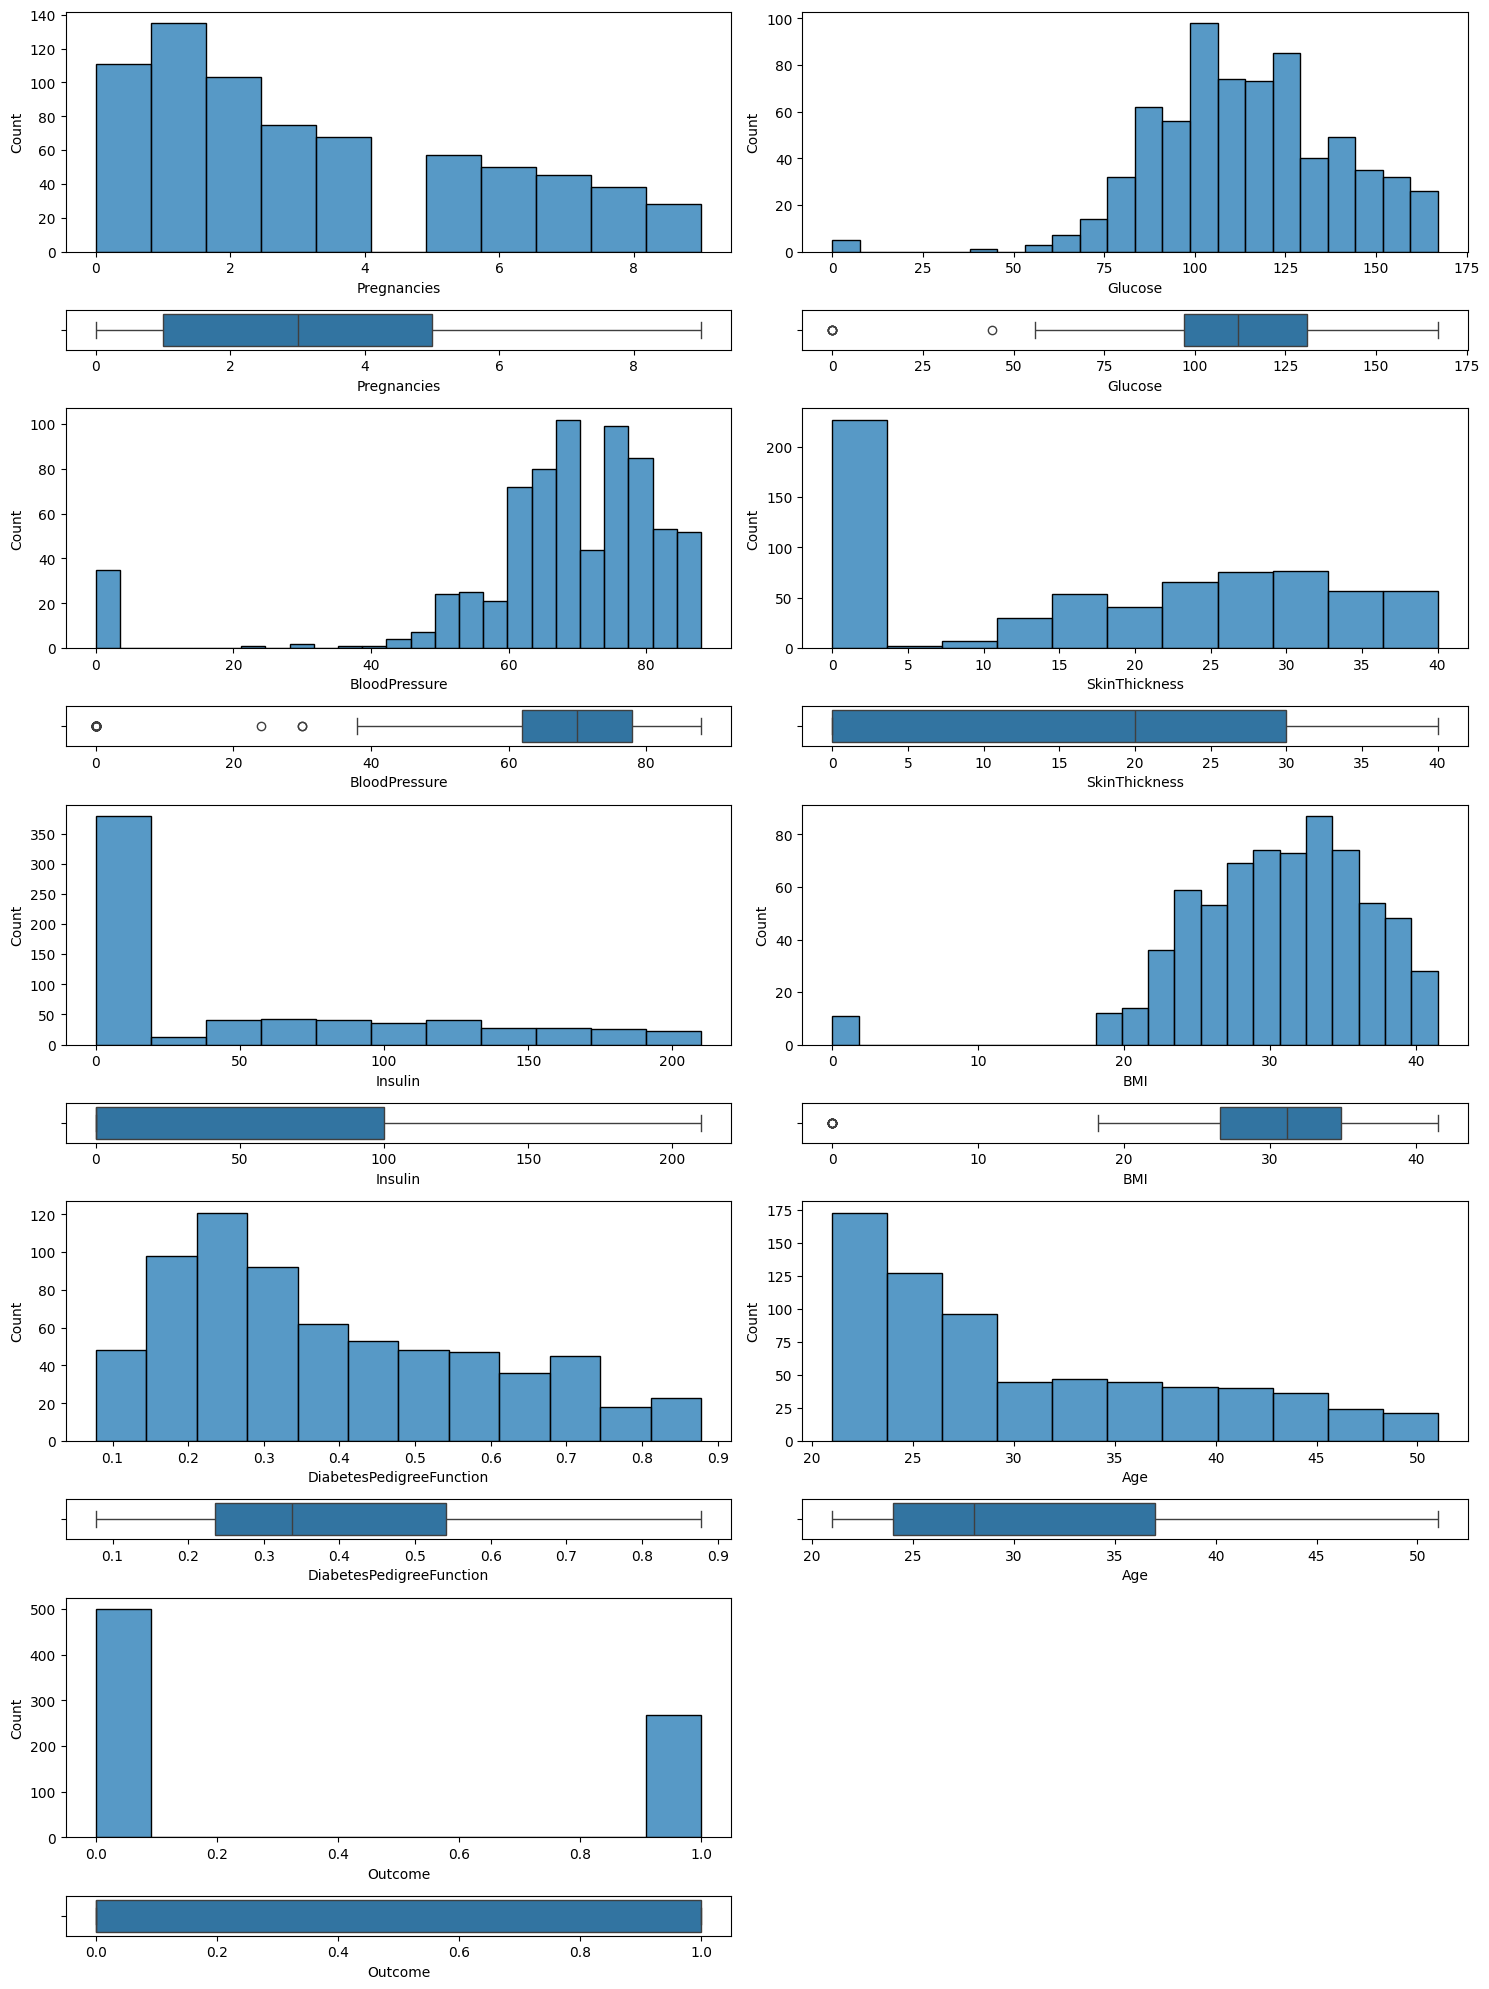

In [9]:
n = len(numerical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols) * 2  # Dos filas por variable para histogramas y boxplots

# Alternar alturas: filas pares grandes para historigraam e impares pequeñas para boxplot
height_ratios = []
for _ in range(n_rows // 2):
    height_ratios.extend([6, 1])
if len(height_ratios) < n_rows:
    height_ratios.append(1)  # Por si hay una fila extra

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows), gridspec_kw={'height_ratios': height_ratios})

# Asegurar que axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for idx, col in enumerate(numerical_column):

    #Limitar los datos a los valores por debajo del percentil 90
    datos_filtrados = df_copy[col].copy()
    limite = datos_filtrados.quantile(0.90)
    datos_filtrados = datos_filtrados[datos_filtrados <= limite]

    # Calcular la posición en la cuadrícula
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1

    sns.histplot(ax=axis[row_hist, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)
    sns.boxplot(ax=axis[row_box, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)


# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, (n_rows // 2) * n_cols):
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1
    fig.delaxes(axis[row_hist, col_pos])
    fig.delaxes(axis[row_box, col_pos])

plt.tight_layout()
plt.show()

* Hay picos destacables en `SkinThickness`, `Insulin` y `Outcome` que apuntan a 0
* Varios gráficos siguen una distribución normal con ligeras variaciones como `Glucose`, `BMI`, `BloodPresure` y `DiabetesPedigreeFuntion`
* `Age` y `Pregnancies` siguen una función decreciente, en el primero es mas claro y en el segundo destaca una ausencia completa por la mitad y un pico saliente cerca de 1 embarazo.

### 4. Análisis multivariante
**4.1. Codificación de valor categorico - numericos**

- Sin columnas categóricas

**4.2. Numerico-Numerico Análisis**

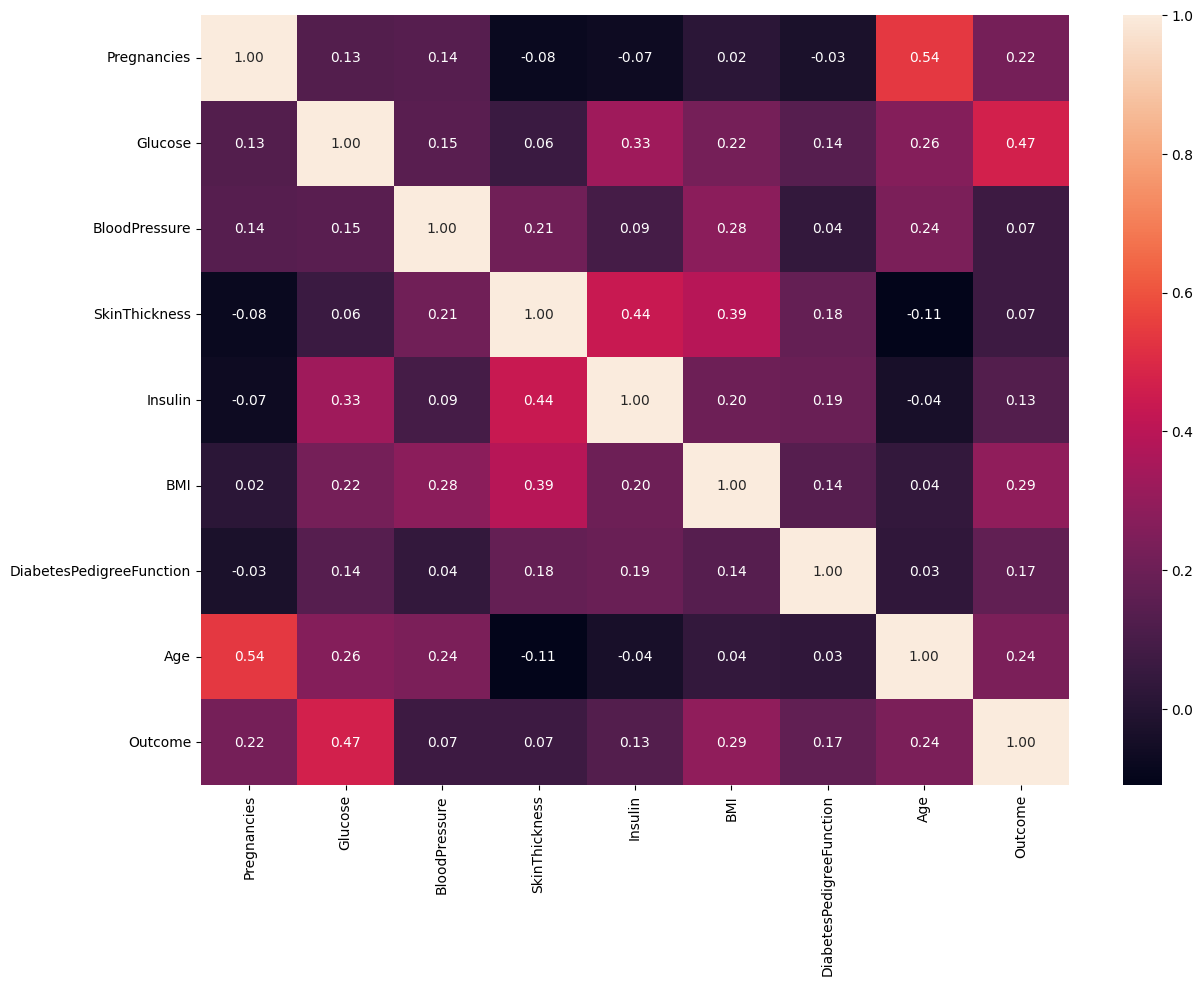

In [10]:
plt.figure(figsize=(14,10))

df_onlyn =  df_copy[numerical_column]

sns.heatmap(df_onlyn.corr().round(2), annot = True, fmt = ".2f")

plt.show()

* Parece haber una fuerte correlación entre `Age` y `Pregnancies`, también con `Glucose` y `Outcome` esta siendo ligada mas a que la glucosa en sangre demuestra si tienes diabetes o no por lo que tiene sentido. 
* Otras fuertemente destacables son `SkinThickness` junto `Insulin` y `BMI`, también `Insulin` y `Glucose` 

**4.3. Categorico-Categorico Análisis**
- Sin categóricas

### 5. Ingeniería de características
**5.1. Análisis de outliers**

In [10]:
df_enc = df_copy.copy()
df_enc.corr().describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.207326,0.306582,0.246427,0.239677,0.250539,0.286731,0.206903,0.244379,0.295971
std,0.355127,0.287678,0.293757,0.341550,0.324265,0.293406,0.307331,0.346347,0.291143
min,-0.081672,0.057328,0.041265,-0.113970,-0.073535,0.017683,-0.033523,-0.113970,0.065068
25%,-0.033523,0.137337,0.088933,0.057328,0.088933,0.140647,0.041265,0.033561,0.130548
50%,0.129459,0.221071,0.152590,0.183928,0.185071,0.221071,0.140647,0.238356,0.221898
75%,0.221898,0.331357,0.239528,0.392573,0.331357,0.292695,0.183928,0.263514,0.292695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las siguientes columnas continuas fueron identificadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


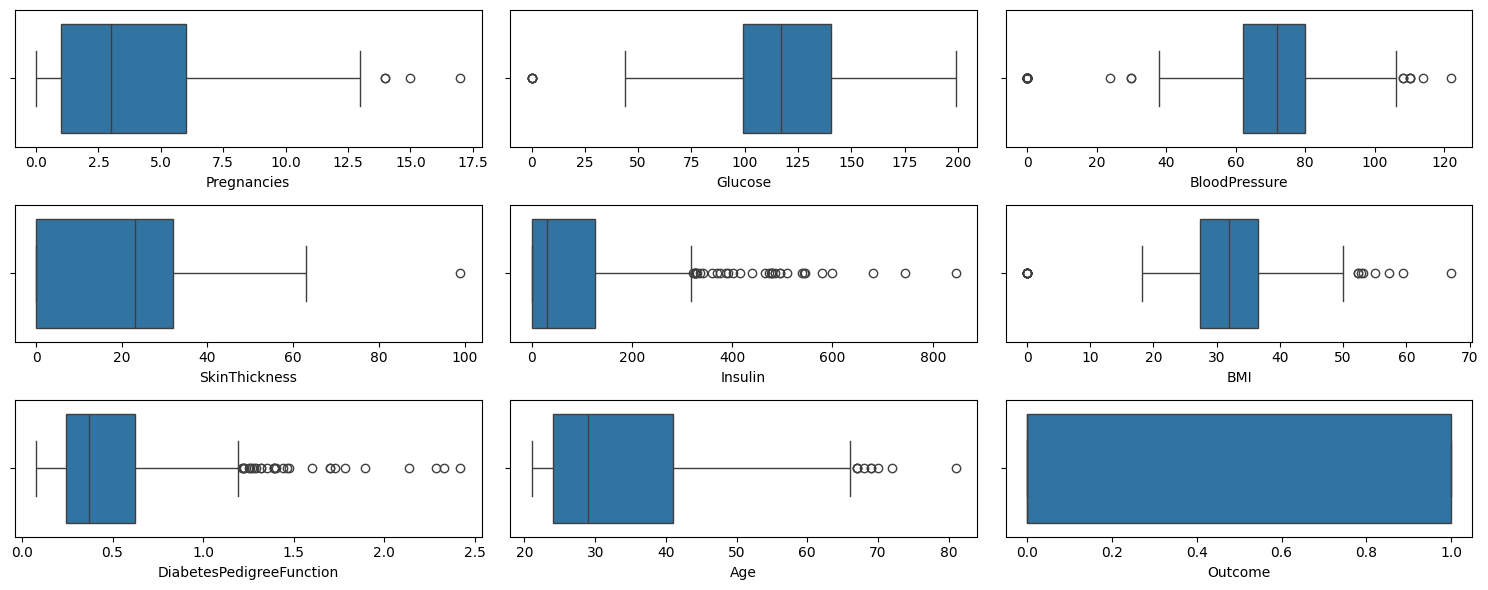

In [11]:
lista_col = list(df_enc.select_dtypes(('float64', 'int64'))) 
print(f"Las siguientes columnas continuas fueron identificadas: {lista_col}")
n = len(lista_col)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)

for idx, col in enumerate(df_enc[lista_col]):
    row = idx // n_cols
    col_pos = idx % n_cols
    sns.boxplot(ax=axis[row, col_pos], data=df_enc, x=col)

# Oculta subplots vacíos
for idx in range(len(lista_col), n_rows * n_cols):
    row = idx // n_cols
    col_pos = idx % n_cols
    fig.delaxes(axis[row, col_pos])

plt.tight_layout()
plt.show()

* Visualizamos los datos de Outcome pero al ser target no debemos sacar los outliers (aunque en este caso no hay)

In [12]:
# Crear una copia para eliminar outliers
df_enc_no = df_enc.copy()

In [13]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [14]:
# outliers con y sin negativos
f_outliers_with_neg = []
f_outliers_no_neg = []

target_col = 'Outcome'
lista_col = [col for col in lista_col if col != target_col]

for each in lista_col:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    else:
        f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=True)

for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

In [15]:
df_enc.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df_enc_no.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


**5.2. Dividir el train/test de marcos de datos**

In [17]:
objetivo = 'Outcome'
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train.to_csv(f'../data/processed/X_train_{reference}.csv', index=False)
    X_test.to_csv(f'../data/processed/X_test_{reference}.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False)
    y_test.to_csv('../data/processed/y_test.csv', index=False)
    
    return X_train, X_test, y_train, y_test

In [18]:
# Separar el DataFrame original 
X_train_con_outliers, X_test_con_outliers, y_train, y_test = split(objetivo, df_enc, 'with_outliers')
X_train_sin_outliers, X_test_sin_outliers, _, _ = split(objetivo, df_enc_no, 'without_outliers')

### 6. Procesamiento de Datos
**6.1. Normalización**

In [19]:
#Retiramos el target de la lista de columnas de estudio
# Esto es necesario para que no se incluya en el entrenamiento y pruebas posteriores
column_list = list(df_enc.columns.drop(objetivo))

In [20]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers) #Recuerda que es el entrenamiento

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers) #Se aplica la normalización
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = column_list) #Se crea un nuevo DataFrame con los datos normalizados

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers) #Lo mismo para el test
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = column_list)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers) #Se repite el proceso pero sin outliers
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = column_list)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = column_list)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,-0.232883,-0.192543,-0.147659,1.160392,0.532958,0.770916,-0.960824,-0.445054
313,-0.232883,-0.256240,-0.970926,-0.668260,0.044161,-0.358999,0.513290,-0.702444
195,0.369181,1.176939,0.778518,1.286505,1.155063,0.941717,-0.202089,-0.359257
570,-0.232883,-1.370934,0.058158,-1.298829,-0.711253,0.035157,-0.589199,0.498712
226,-1.135979,-0.638421,0.366884,-1.298829,-0.711253,0.455591,-0.812174,-0.616647


In [21]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = column_list)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = column_list)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = column_list)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = column_list)

X_train_con_outliers_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,0.176471,0.577889,0.540984,0.619048,0.188172,0.641414,0.030743,0.116667
313,0.176471,0.567839,0.409836,0.158730,0.114247,0.496633,0.233988,0.066667
195,0.294118,0.793970,0.688525,0.650794,0.282258,0.663300,0.135354,0.133333
570,0.176471,0.391960,0.573770,0.000000,0.000000,0.547138,0.081981,0.300000
226,0.000000,0.507538,0.622951,0.000000,0.000000,0.601010,0.051238,0.083333


**6.3. Guardado en archivos xlsx**

In [22]:
lista = ["X_train_con_outliers", "X_train_sin_outliers", "X_train_con_outliers_norm", "X_train_sin_outliers_norm", "X_train_con_outliers_scal", "X_train_sin_outliers_scal",
         "X_test_con_outliers", "X_test_sin_outliers", "X_test_con_outliers_norm", "X_test_sin_outliers_norm", "X_test_con_outliers_scal", "X_test_sin_outliers_scal",
         "y_train", "y_test"]
for var in lista:
    globals()[var].to_excel(f"../data/processed/{var}.xlsx", index = False)

In [23]:
with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 7. Machine Learning
**7.1. Decisión de DataSet y Arbol de decisiones**

In [24]:
train, test = [], []

for var in lista:
    df = pd.read_excel(f"../data/processed/{var}.xlsx")
    if "train" in var:
        train.append((var, df))
    elif "test" in var:
        test.append((var, df))

In [40]:
results_tree = []
models_tree = []

datasets = [
    ("X_train_con_outliers", X_train_con_outliers),
    ("X_train_sin_outliers", X_train_sin_outliers),
    ("X_train_con_outliers_norm", X_train_con_outliers_norm),
    ("X_train_sin_outliers_norm", X_train_sin_outliers_norm),
    ("X_train_con_outliers_scal", X_train_con_outliers_scal),
    ("X_train_sin_outliers_scal", X_train_sin_outliers_scal),
]

for name, dataset in datasets:
    model_tree = DecisionTreeClassifier(random_state=42)
    model_tree.fit(dataset, y_train)
    y_pred = model_tree.predict(dataset)
    
    results_tree.append(accuracy_score(y_train, y_pred))
    models_tree.append((name, model_tree))
  


best_index = results_tree.index(max(results_tree))
print("Resultados árbol:", results_tree)
print("Mejor accuracy:", max(results_tree))
print("Mejor dataset:", datasets[best_index][0])

best_dataset_tree = datasets[best_index][1]
best_model_tree = models_tree[best_index][1]

Resultados árbol: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mejor accuracy: 1.0
Mejor dataset: X_train_con_outliers


**7.2. Revisión de datos**

In [26]:
X_train = best_dataset_tree
X_test = X_test_con_outliers   

In [27]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


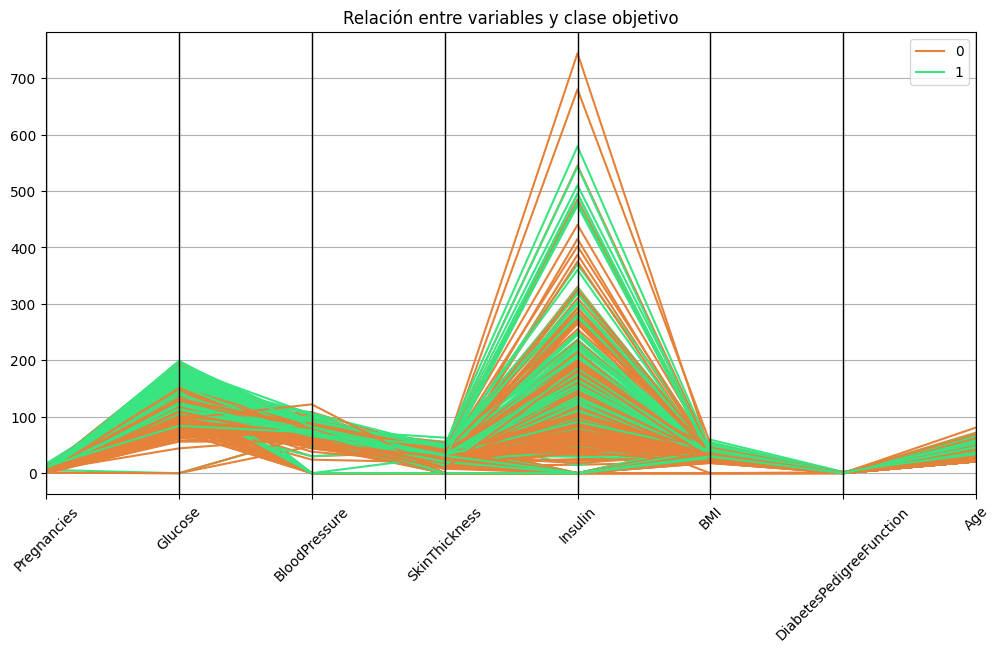

In [ ]:
# Combinar X_train con el target para visualizar
total_data = X_train.copy()
total_data["Outcome"] = y_train.values  

# Graficar
plt.figure(figsize=(12, 6))
parallel_coordinates(total_data, "Outcome", color=("#E58139", "#39E581", "#8139E5"))
plt.title("Relación entre variables y clase objetivo")
plt.xticks(rotation=45)
plt.show()

Siendo la leyenda respecto a la columna `Outcome`, se representa con 0 a los pacientes sin diabetes y con 1 a los que si la tienen.

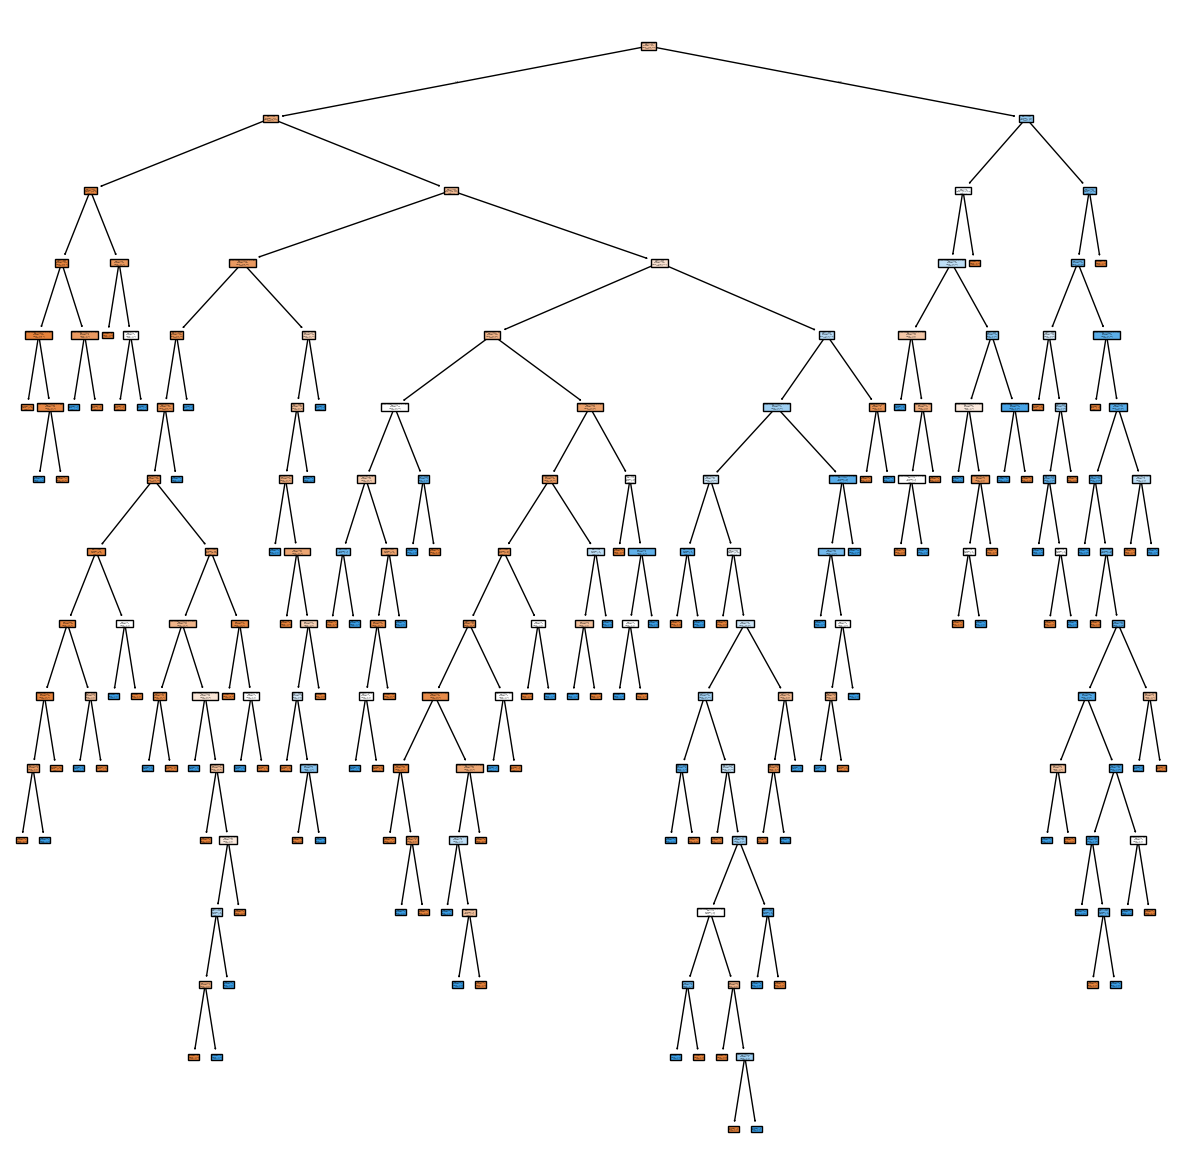

In [34]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(best_model_tree, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

**7.4. Guardar el mejor Modelo**

In [44]:
with open("../data/decision_tree_classifier_default_42.sav", "wb") as file:
    pickle.dump(best_model_tree, file)